In [1]:
#import bibliotek
import os
import sklearn
from skimage import io
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import preprocessing as pre
import cv2
from pca2d import two_d_pca_class
from pca2d_square import two_d_square_pca_class


In [2]:
#załadowanie zdjęć
directory = "images"

data = np.zeros((13804, 60, 60))
#data = np.zeros((1000, 60, 60))

for index, filename in enumerate(os.listdir(directory)):
    
        f = os.path.join(directory, filename)
        img = io.imread(f)
        
        if img.shape[2] < 4:
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            img = pre.preprop_hachaj(img)
            img = pre.mass_mean(img)
            img = pre.rotate(img)
            data[index, :, :] = img

  

In [3]:
pca = two_d_pca_class(data, None,None)
pca_square = two_d_square_pca_class(data, None,None)

In [4]:
new_coordinates = pca.reduce_dim()

print("----------")

new_coordinates1 = pca_square.reduce_dim()

0.9646062197208743
----------
D
0.9646062197208743
D
0.9540379036601693


(60, 5)
(13804, 60, 5)
(60, 5)


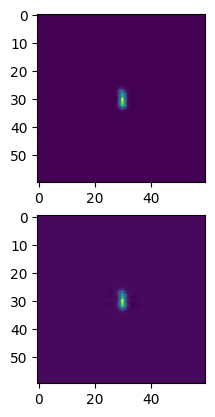

In [5]:
print(pca.new_bases.shape)
print(new_coordinates.shape)
  
plt.subplot(2,1,1)  
plt.imshow(pca.images[0])
plt.subplot(2,1,2)  
plt.imshow(pca.original_data(new_coordinates[0]))

print(new_coordinates[0].shape)

In [6]:
lista_f1 = []
lista_f2 = []

for i in range(13804):
    
    obraz1 = pca.images[i]
    obraz2 = pca.original_data(new_coordinates[i])
        
    diff = abs(np.subtract(obraz1, obraz2))
    diff_2 = diff**2
    sum_diff = sum(sum(diff))/len(diff)
    sum_diff_2 = sum(sum(diff_2))/len(diff_2)
    lista_f1.append(sum_diff)
    lista_f2.append(sum_diff_2)

Text(0, 0.5, 'Błąd średniokwadratowy (skalowany)')

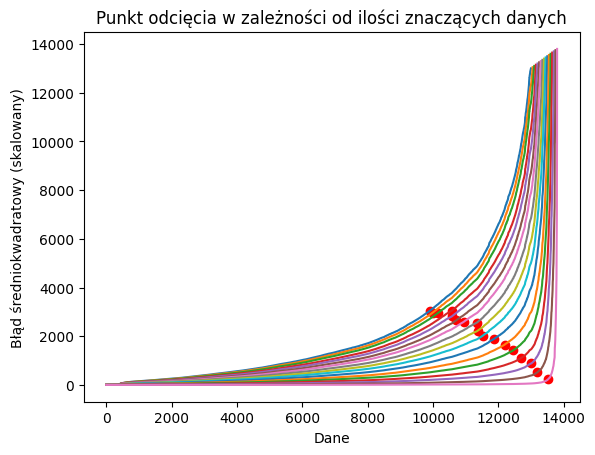

In [7]:
x = 50

#histogram pokazujący skutecznośc pca, czyli jak bardzo obraz pierwotny rozni sie od rozkladu
a, b = np.histogram(np.array(lista_f2), x, (0, 50))

#new = sorted(lista_f2)[:13600]
#plt.plot(new)

lis=[]

for i in range(13000, 13850, 50):
    liczba = i
    lista = sorted(lista_f2)[:liczba]
    lista = lista/max(lista) * liczba

    plt.plot(lista)

    a = 1000000000
    ind = 0
    for index, i in enumerate(lista):
        num = (liczba - index)**2 + i**2
        if num < a:
            a = num
            ind = index
    lis.append(ind)

    plt.scatter(ind, lista[ind], c = "red")
plt.title("Punkt odcięcia w zależności od ilości znaczących danych")
plt.xlabel("Dane")
plt.ylabel("Błąd średniokwadratowy (skalowany)")

[3905, 3812, 3649, 3230, 3230, 3084, 2865, 2458, 2434, 2287, 1921, 1612, 1340, 1120, 791, 614, 285]


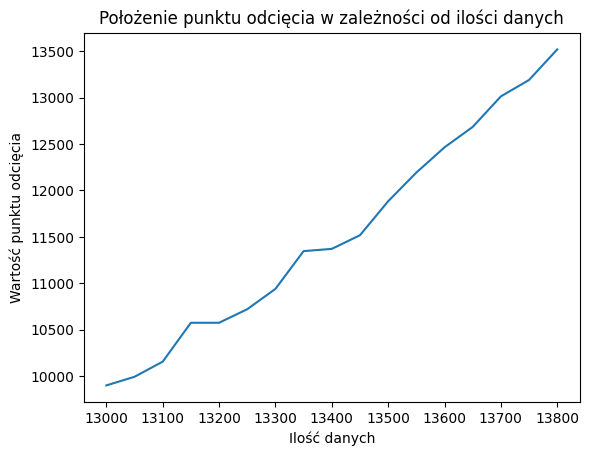

In [8]:
plt.plot(range(13000, 13850, 50),lis)
plt.title("Położenie punktu odcięcia w zależności od ilości danych")
plt.xlabel("Ilość danych")
plt.ylabel("Wartość punktu odcięcia")
print([13804-i for i in lis])

(300, 13804)


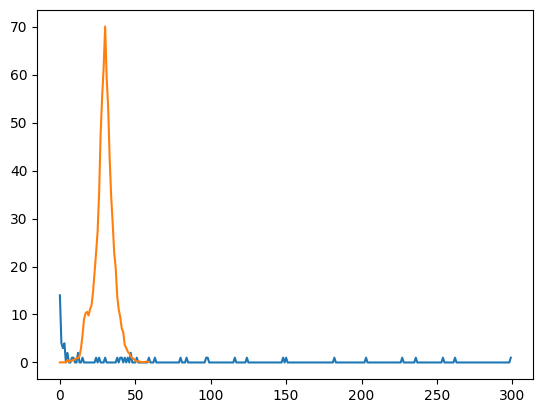

In [9]:
#cechy = np.zeros((300, 13804))

cechy = new_coordinates.reshape((13804, 300))
cechy  = cechy.T

print(cechy.shape)

"""for i in range(100):
    x = 50
    plt.subplot(10, 10, i+1)
    a, b = np.histogram(np.array(cechy[i]),x, (np.min(cechy[i]),np.max(cechy[i])))
    plt.plot(a)"""
lista = {}
a = 4
for index, i in enumerate(range(0+a,  300, 5)):

    #print(np.min(cechy[i]), np.max(cechy[i]), np.mean(cechy[i]))
    lista[index] = np.var(cechy[i])

x = 300

lista = [i for i in lista.values()]
a, b = np.histogram(lista, x, (min(lista),max(lista)))
plt.plot(a)
plt.plot(lista)
   

In [10]:
# cumulative Z-SCORE

lista = np.zeros(13804)

for index, i in enumerate(range(300)):
    c= cechy[i]
    var = np.var(cechy[i])
    mean = np.mean(cechy[i])

    lista += abs((cechy[i] - mean)/var)

    

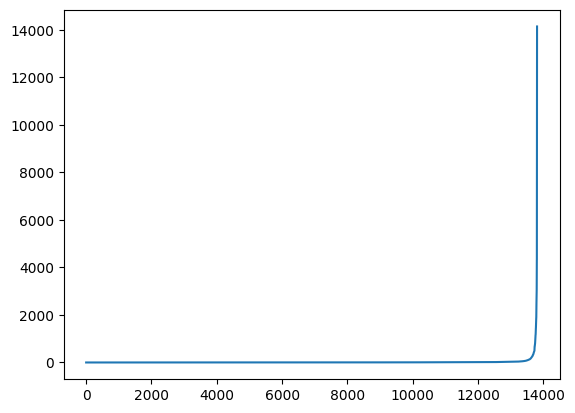

In [27]:
indexes = [x for _, x in sorted(zip(lista_f2 ,range(0, 13804)))]

plt.plot(sorted(lista_f2))#[:13000])


-500
-501
-502
-503
-504
-505
-506
-507
-508
-509
-510
-511
-512
-513
-514
-515


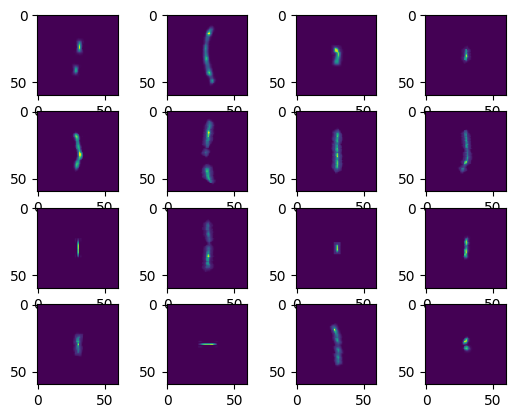

In [32]:
for index, i in enumerate(range(-500, -516, -1)):
    plt.subplot(4, 4, index+1)
    print(i)
    plt.imshow(pca.images[indexes[i]])
    #print(indexes[-1+i])
    #plt.subplot(4, 4, index+1)
    #plt.imshow(pca.original_data(new_coordinates[indexes[-1+i]]))

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel="linear")

y = np.array([0 for i in range(8000)]+[1])
x = np.array([new_coordinates[i] for i in indexes[:8000]]+[new_coordinates[indexes[-1]]], dtype=int)

x = x.reshape((8001, 300))

svm.fit(x, y)

SVC(kernel='linear')

In [14]:
acc = accuracy_score(y, svm.predict(x))
print(acc)

1.0


In [15]:
y_test = np.array([0 for i in range(13804)])
x_test = np.array([new_coordinates[i] for i in range(13804)])

x_test = x_test.reshape((13804, 300))

acc = accuracy_score(y_test, svm.predict(x_test))
print(acc)

0.9986235873659809


In [16]:
#proba klastrowania cech
from sklearn.cluster import DBSCAN

dane = new_coordinates.reshape((13804, 300))

In [17]:
lista_y = []
lista_x = []
for epsilon in range(100, 750, 50):    
    dbscan_opt=DBSCAN(eps=epsilon,min_samples=20)
    dbscan_opt.fit(dane)
    labels = dbscan_opt.labels_
    
    #unique, counts = np.unique(labels, return_counts=True)
    #zliczenie = dict(zip(unique, counts))
    #print(zliczenie)

    outliers = np.where(labels == -1)[0]
    #print(len(outliers))

    #print(len(unique_labels))
    #print(len(labels) - np.count_nonzero(labels))
    lista_x.append(epsilon)
    lista_y.append(len(outliers))



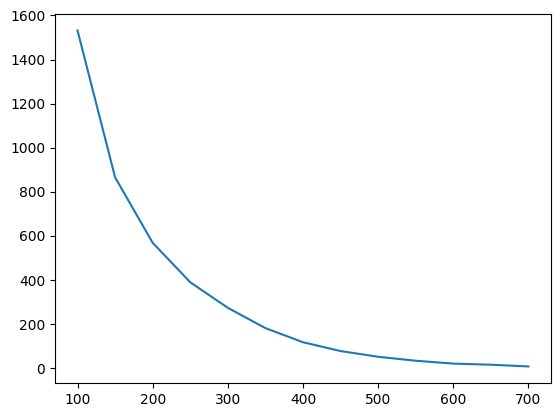

In [18]:
plt.plot(lista_x, lista_y)